In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager as fm

In [3]:
import pgmpy

In [30]:
plt.rcParams["font.family"] = 'Nanum Brush Script OTF'
plt.rcParams["font.size"] = 10
# plt.rcParams["figure.figsize"] = (14,4)


path = '/home/jovyan/work/Fonts/NanumBarunGothic.ttf'

import matplotlib

matplotlib.font_manager._rebuild()

font_name = fm.FontProperties(fname=path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumBarunGothic


In [31]:
data = pd.read_csv("../교통사망사고정보/Kor_Train_교통사망사고정보(12.1~17.6).csv", encoding='euc-kr')

In [32]:
data.head()

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2017,2017063023,14,야간,금,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,보행자,보행자,967633,1937456,127.134130,37.435704
1,2017,2017063021,45,야간,금,1,4,2,1,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,966456,1696405,127.131220,35.262534
2,2017,2017063021,50,야간,금,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,보행자,보행자,900057,1865697,126.379922,36.784142
3,2017,2017063019,10,야간,금,1,1,0,0,0,...,교차로,교차로부근,승용차,승용차,이륜차,이륜차,1095230,1764891,128.554945,35.875973
4,2017,2017063017,2,주간,금,1,2,1,0,0,...,단일로,교량위,이륜차,이륜차,화물차,화물차,947576,1946355,126.906786,37.514993


In [134]:
numeric_predictor = ['사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수']
categorical_predictor = ['주야', '요일', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '법규위반', '도로형태_대분류', '도로형태', '당사자종별_1당_대분류', '당사자종별_2당_대분류']

In [141]:
test_columns = np.array(numeric_predictor + categorical_predictor)

In [138]:
len(data.columns)

28

In [142]:
len(test_columns)

16

In [143]:
data.columns

Index(['발생년', '발생년월일시', '발생분', '주야', '요일', '사망자수', '사상자수', '중상자수', '경상자수',
       '부상신고자수', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '법규위반_대분류',
       '법규위반', '도로형태_대분류', '도로형태', '당사자종별_1당_대분류', '당사자종별_1당', '당사자종별_2당_대분류',
       '당사자종별_2당', '발생위치X_UTMK', '발생위치Y_UTMK', '경도', '위도', '시간'],
      dtype='object')

Test dataset에는 없는 predictors

In [145]:
np.setdiff1d(data.columns, test_columns)

array(['경도', '당사자종별_1당', '당사자종별_2당', '발생년', '발생년월일시', '발생분', '발생위치X_UTMK',
       '발생위치Y_UTMK', '법규위반_대분류', '사고유형', '시간', '위도'], dtype=object)

년도별 발생 빈도가 줄어들고 있음

In [37]:
data['발생년월일시'] = pd.to_datetime(data['발생년월일시'], format='%Y%m%d%H')

In [38]:
data.head()

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2017,2017-06-30 23:00:00,14,야간,금,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,보행자,보행자,967633,1937456,127.134130,37.435704
1,2017,2017-06-30 21:00:00,45,야간,금,1,4,2,1,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,966456,1696405,127.131220,35.262534
2,2017,2017-06-30 21:00:00,50,야간,금,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,보행자,보행자,900057,1865697,126.379922,36.784142
3,2017,2017-06-30 19:00:00,10,야간,금,1,1,0,0,0,...,교차로,교차로부근,승용차,승용차,이륜차,이륜차,1095230,1764891,128.554945,35.875973
4,2017,2017-06-30 17:00:00,2,주간,금,1,2,1,0,0,...,단일로,교량위,이륜차,이륜차,화물차,화물차,947576,1946355,126.906786,37.514993


In [47]:
data = data.assign(시간 = data['발생년월일시'].dt.hour)

In [48]:
data.head()

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,시간
0,2017,2017-06-30 23:00:00,14,야간,금,1,1,0,0,0,...,기타단일로,승용차,승용차,보행자,보행자,967633,1937456,127.134130,37.435704,23
1,2017,2017-06-30 21:00:00,45,야간,금,1,4,2,1,0,...,기타단일로,승용차,승용차,승용차,승용차,966456,1696405,127.131220,35.262534,21
2,2017,2017-06-30 21:00:00,50,야간,금,1,1,0,0,0,...,기타단일로,승용차,승용차,보행자,보행자,900057,1865697,126.379922,36.784142,21
3,2017,2017-06-30 19:00:00,10,야간,금,1,1,0,0,0,...,교차로부근,승용차,승용차,이륜차,이륜차,1095230,1764891,128.554945,35.875973,19
4,2017,2017-06-30 17:00:00,2,주간,금,1,2,1,0,0,...,교량위,이륜차,이륜차,화물차,화물차,947576,1946355,126.906786,37.514993,17


In [62]:
data['주야'].value_counts()

야간    12913
주간    12124
Name: 주야, dtype: int64

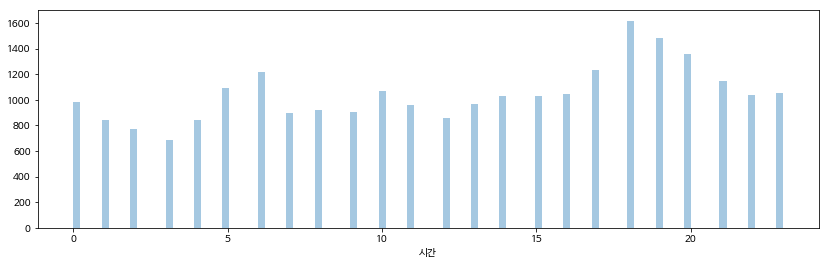

In [63]:
sns.distplot(data['시간'], bins=100, kde=False)

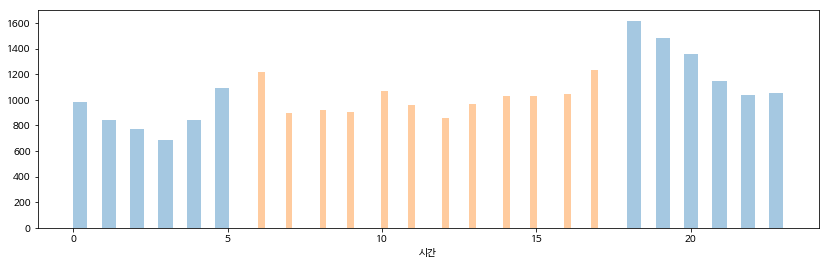

In [61]:
sns.distplot(data.loc[data['주야'] == '야간', '시간'], bins=50, kde=False)
sns.distplot(data.loc[data['주야'] == '주간', '시간'], bins=50, kde=False)
plt.show()

In [70]:
order = ['월', '화', '수', '목', '금', '토', '일']

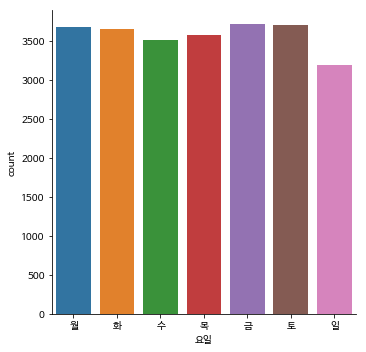

In [71]:
sns.catplot(x='요일', kind="count", data=data, order=order)

In [72]:
data = data.loc[(data['경도'] < 130) & (data['경도'] > 125)]


In [84]:
from matplotlib.colors import LogNorm
import copy

cmap = copy.copy(plt.cm.jet)
cmap.set_bad((0,0,0))

plt.figure(figsize=(10, 15))
plt.hist2d(data['경도'], data['위도'], bins=300, norm=LogNorm(), cmap=cmap);

In [94]:
data.columns

Index(['발생년', '발생년월일시', '발생분', '주야', '요일', '사망자수', '사상자수', '중상자수', '경상자수',
       '부상신고자수', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '법규위반_대분류',
       '법규위반', '도로형태_대분류', '도로형태', '당사자종별_1당_대분류', '당사자종별_1당', '당사자종별_2당_대분류',
       '당사자종별_2당', '발생위치X_UTMK', '발생위치Y_UTMK', '경도', '위도', '시간'],
      dtype='object')

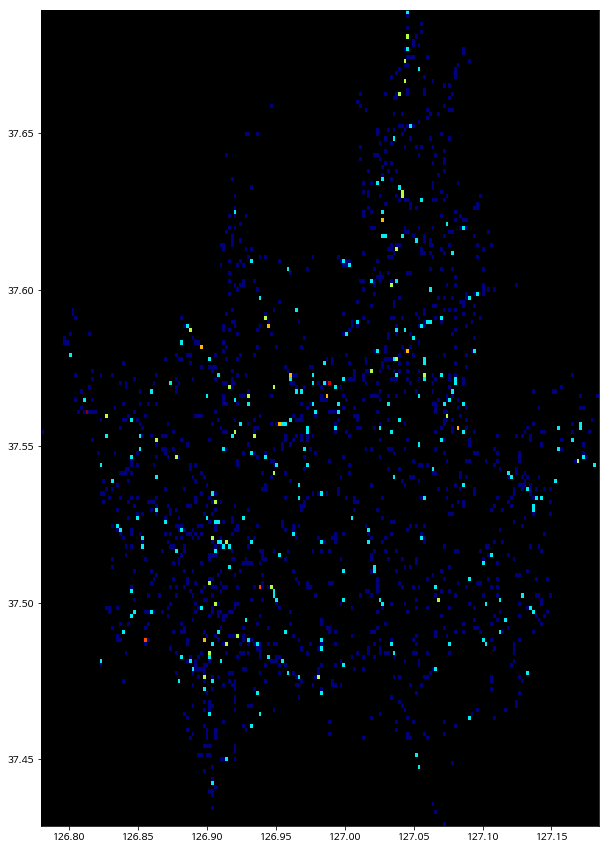

In [105]:
data_seoul = data.loc[data['발생지시도'] == '서울']
plt.figure(figsize=(10, 15))
plt.hist2d(data_seoul['경도'], data_seoul['위도'], bins=200, norm=LogNorm(), cmap=cmap);

In [146]:
data.head()

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,시간
0,2017,2017-06-30 23:00:00,14,야간,금,1,1,0,0,0,...,기타단일로,승용차,승용차,보행자,보행자,967633,1937456,127.134130,37.435704,23
1,2017,2017-06-30 21:00:00,45,야간,금,1,4,2,1,0,...,기타단일로,승용차,승용차,승용차,승용차,966456,1696405,127.131220,35.262534,21
2,2017,2017-06-30 21:00:00,50,야간,금,1,1,0,0,0,...,기타단일로,승용차,승용차,보행자,보행자,900057,1865697,126.379922,36.784142,21
3,2017,2017-06-30 19:00:00,10,야간,금,1,1,0,0,0,...,교차로부근,승용차,승용차,이륜차,이륜차,1095230,1764891,128.554945,35.875973,19
4,2017,2017-06-30 17:00:00,2,주간,금,1,2,1,0,0,...,교량위,이륜차,이륜차,화물차,화물차,947576,1946355,126.906786,37.514993,17


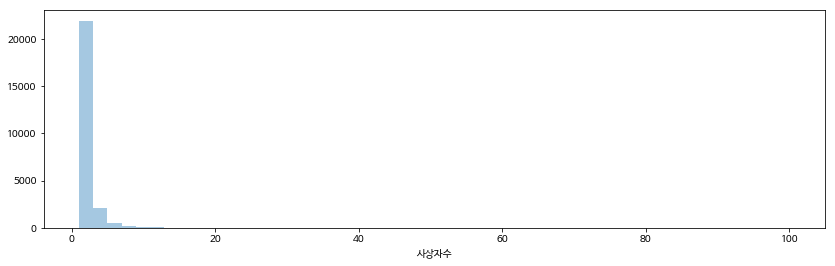

In [151]:
sns.distplot(data['사상자수'], kde=False)

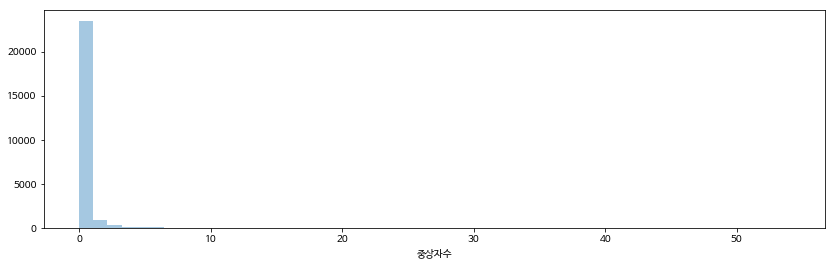

In [152]:
sns.distplot(data['중상자수'], kde=False)

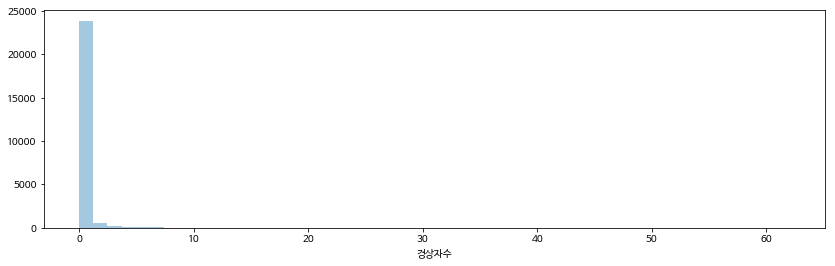

In [153]:
sns.distplot(data['경상자수'], kde=False)


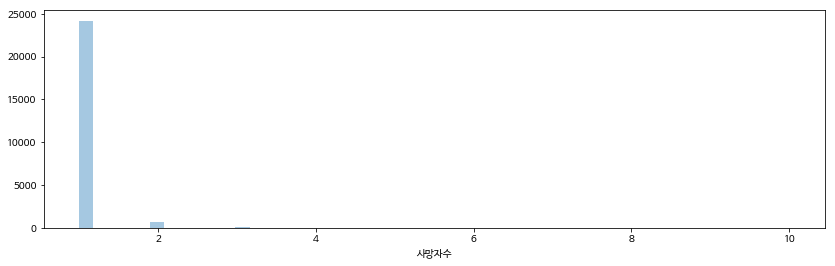

In [149]:
sns.distplot(data['사망자수'], kde=False)

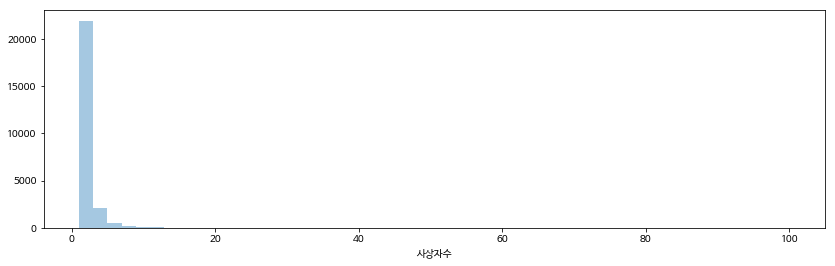

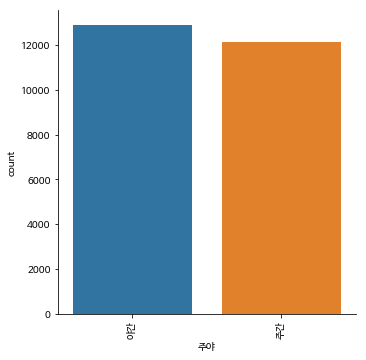

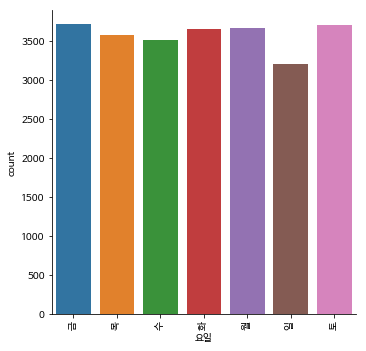

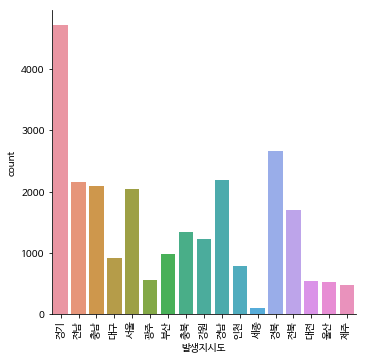

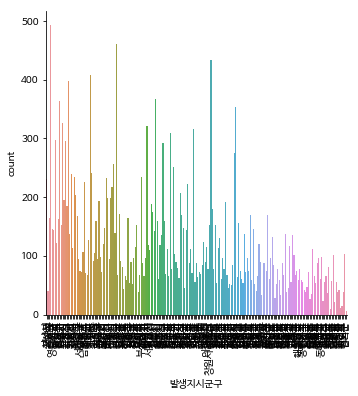

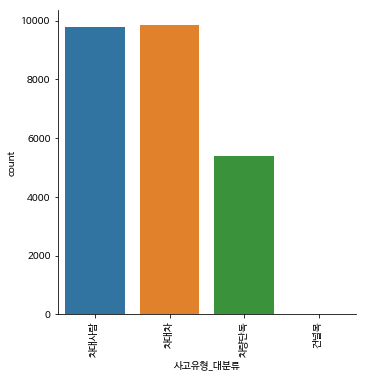

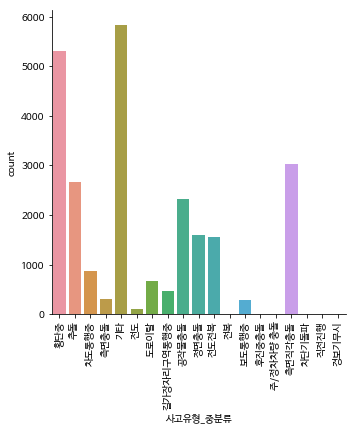

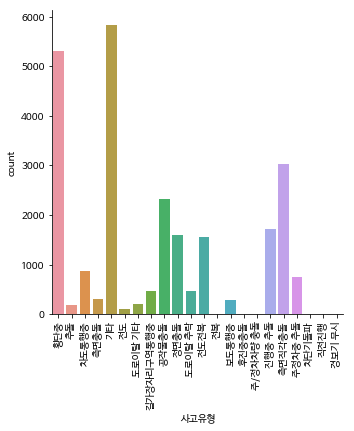

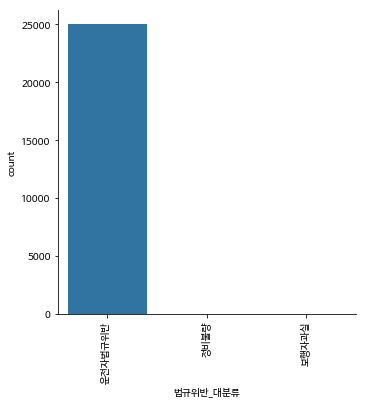

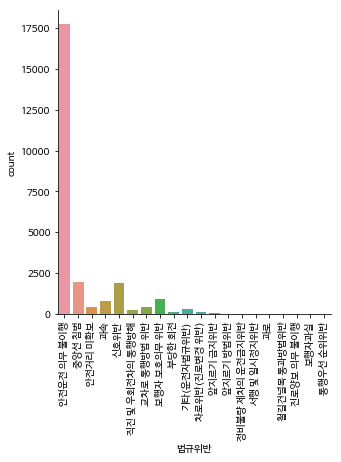

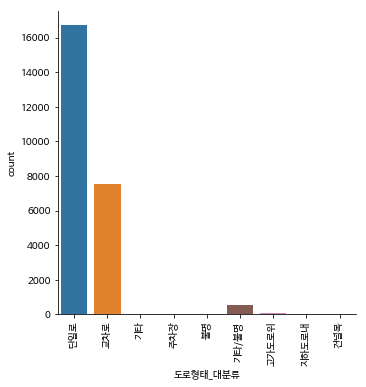

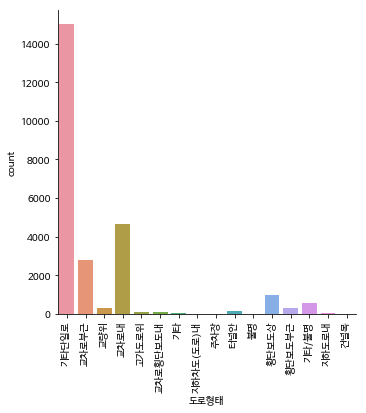

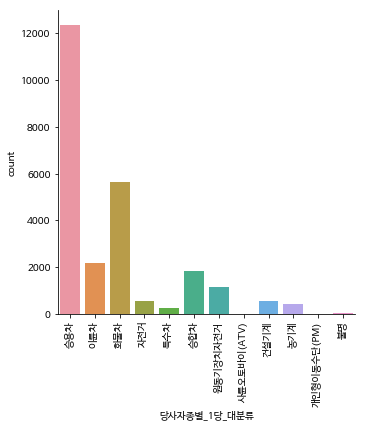

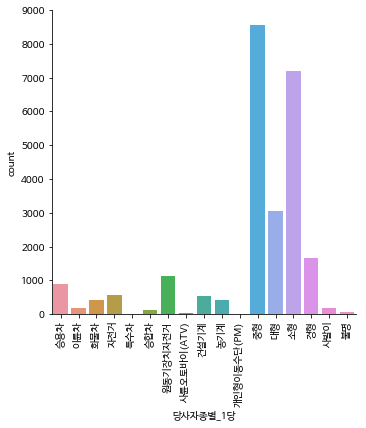

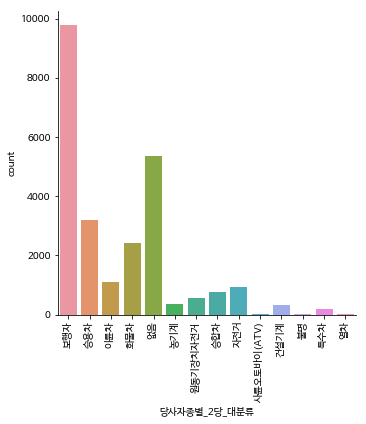

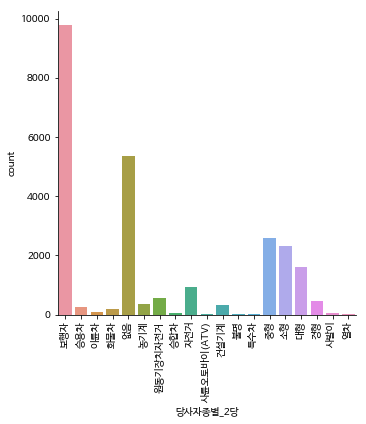

In [127]:
for col in data.columns:
    if data[col].dtype == np.object:
        sns.catplot(x=col, kind='count', data=data)
        plt.xticks(rotation=90)
        plt.show()
        
    

In [ ]:
plt.figure(figsize=(10, 15))
plt.hist2d(data['경도'], data['위도'], bins=300, norm=LogNorm(), cmap=cmap);

In [47]:
data['사망자수'].head()

0    1
1    1
2    1
3    1
4    1
Name: 사망자수, dtype: int64

In [37]:
data['사상자수'].head()

0    1
1    4
2    1
3    1
4    2
Name: 사상자수, dtype: int64

In [38]:
data['중상자수'].head()

0    0
1    2
2    0
3    0
4    1
Name: 중상자수, dtype: int64

In [39]:
data['경상자수'].head()

0    0
1    1
2    0
3    0
4    0
Name: 경상자수, dtype: int64

In [40]:
data['부상신고자수'].head()

0    0
1    0
2    0
3    0
4    0
Name: 부상신고자수, dtype: int64

In [110]:
data.columns

Index(['발생년', '발생년월일시', '발생분', '주야', '요일', '사망자수', '사상자수', '중상자수', '경상자수',
       '부상신고자수', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '법규위반_대분류',
       '법규위반', '도로형태_대분류', '도로형태', '당사자종별_1당_대분류', '당사자종별_1당', '당사자종별_2당_대분류',
       '당사자종별_2당', '발생위치X_UTMK', '발생위치Y_UTMK', '경도', '위도'],
      dtype='object')

In [107]:
data.head()

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2017,2017-06-30 23:00:00,14,야간,금,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,보행자,보행자,967633,1937456,127.134130,37.435704
1,2017,2017-06-30 21:00:00,45,야간,금,1,4,2,1,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,966456,1696405,127.131220,35.262534
2,2017,2017-06-30 21:00:00,50,야간,금,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,보행자,보행자,900057,1865697,126.379922,36.784142
3,2017,2017-06-30 19:00:00,10,야간,금,1,1,0,0,0,...,교차로,교차로부근,승용차,승용차,이륜차,이륜차,1095230,1764891,128.554945,35.875973
4,2017,2017-06-30 17:00:00,2,주간,금,1,2,1,0,0,...,단일로,교량위,이륜차,이륜차,화물차,화물차,947576,1946355,126.906786,37.514993


In [105]:
len(data['발생위치X_UTMK'].unique())

23426

In [106]:
len(data['발생위치X_UTMK'])

25037

In [108]:
len(data['발생위치Y_UTMK'])

25037

In [109]:
len(data['발생위치Y_UTMK'].unique())

23911

In [18]:
# plt.hist(data['발생지시도'].head(300).values)

In [ ]:
data['발생지시도']

In [32]:
data['요일'].unique()

array(['금', '목', '수', '화', '월', '일', '토'], dtype=object)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

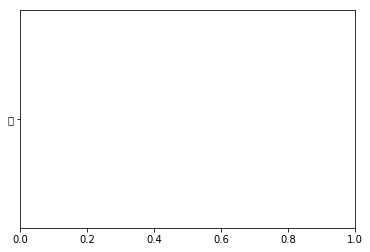

In [30]:
plt.bar(np.arange(7), data['요일'].head(100));

In [25]:
data['요일'].head(30)

0     금
1     금
2     금
3     금
4     금
5     금
6     금
7     금
8     금
9     금
10    금
11    금
12    금
13    목
14    목
15    목
16    목
17    목
18    목
19    목
20    목
21    목
22    목
23    목
24    목
25    목
26    목
27    수
28    수
29    수
Name: 요일, dtype: object

In [4]:
import matplotlib.font_manager as fm

In [5]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

In [6]:
print (plt.rcParams['font.family'] )

['sans-serif']


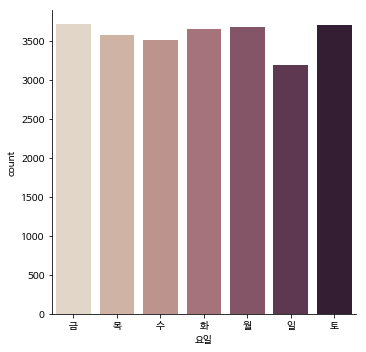

In [26]:
sns.catplot(x="요일", kind="count", palette="ch:.25", data=data);

In [28]:
data

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2017,2017063023,14,야간,금,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,보행자,보행자,967633,1937456,127.134130,37.435704
1,2017,2017063021,45,야간,금,1,4,2,1,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,966456,1696405,127.131220,35.262534
2,2017,2017063021,50,야간,금,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,보행자,보행자,900057,1865697,126.379922,36.784142
3,2017,2017063019,10,야간,금,1,1,0,0,0,...,교차로,교차로부근,승용차,승용차,이륜차,이륜차,1095230,1764891,128.554945,35.875973
4,2017,2017063017,2,주간,금,1,2,1,0,0,...,단일로,교량위,이륜차,이륜차,화물차,화물차,947576,1946355,126.906786,37.514993
5,2017,2017063010,59,주간,금,1,1,0,0,0,...,단일로,기타단일로,이륜차,이륜차,승용차,승용차,939085,1681915,126.831392,35.130593
6,2017,2017063009,45,주간,금,1,3,2,0,0,...,교차로,교차로내,승용차,승용차,화물차,화물차,1086800,1742412,128.459134,35.674109
7,2017,2017063008,20,주간,금,1,1,0,0,0,...,단일로,기타단일로,화물차,화물차,보행자,보행자,964452,1924850,127.098780,37.321961
8,2017,2017063006,30,주간,금,1,1,0,0,0,...,단일로,기타단일로,화물차,화물차,이륜차,이륜차,917238,1855415,126.573561,36.693121
9,2017,2017063004,0,야간,금,1,2,0,1,0,...,단일로,기타단일로,화물차,화물차,승용차,승용차,1024580,1665614,127.769316,34.985147


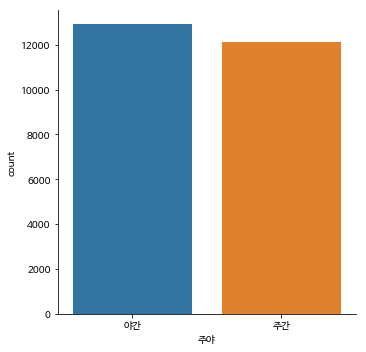

In [27]:
sns.catplot(x='주야', kind='count', data=data)

In [43]:
import matplotlib.font_manager as font_manager

font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

# 전체개수
print(len(font_list)) 

# 처음 10개만 출력
font_list[:10] 

38


['/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansCondensed.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSans-BoldOblique.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansCondensed-BoldOblique.ttf']

In [46]:
font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
font_list = [f.name for f in matplotlib.font_manager.fontManager.ttflist]
print(len(font_list))
[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]

NameError: name 'matplotlib' is not defined

In [47]:
plt.rcParams["font.family"] = 'NanumGothic'

In [15]:
from pgmpy.estimators import ExhaustiveSearch

In [16]:
data = pd.DataFrame(np.random.randint(0, 5, size=(5000, 2)), columns=list('AB'))

In [17]:
data['C'] = data['B']

In [18]:
est = ExhaustiveSearch(data)

In [19]:
est

In [20]:
best_model = est.estimate()
best_model

TypeError: can only concatenate list (not "dict_keyiterator") to list

In [ ]:




>>> est = ExhaustiveSearch(data)
>>> best_model = est.estimate()
>>> best_model
<pgmpy.models.BayesianModel.BayesianModel object at 0x7f695c535470>
>>> best_model.edges()

In [21]:
import numpy as np
import pandas as pd

raw_data = np.random.randint(low=0, high=2, size=(1000, 5))
data = pd.DataFrame(raw_data, columns=['D', 'I', 'G', 'L', 'S'])
print(data)


     D  I  G  L  S
0    0  1  0  1  1
1    0  0  0  0  1
2    0  1  0  0  0
3    1  1  0  0  1
4    1  1  0  0  0
5    0  1  0  1  0
6    0  1  1  1  0
7    1  1  0  1  0
8    1  1  1  0  1
9    0  0  1  0  0
10   0  0  1  1  1
11   1  0  0  0  0
12   0  1  0  0  0
13   1  0  1  0  0
14   0  0  0  0  0
15   1  0  0  0  1
16   1  0  0  1  0
17   0  0  1  0  0
18   0  1  0  0  0
19   1  1  1  0  0
20   1  1  0  0  1
21   0  0  0  1  1
22   1  0  1  0  0
23   0  0  1  1  1
24   1  1  1  1  0
25   0  1  0  1  1
26   1  1  1  0  0
27   1  0  1  1  1
28   0  1  0  0  0
29   1  0  0  0  0
..  .. .. .. .. ..
970  0  1  1  1  0
971  0  1  1  0  0
972  1  0  0  1  0
973  0  1  1  1  0
974  0  1  1  0  1
975  1  1  1  1  1
976  0  1  1  0  0
977  0  1  1  0  1
978  0  1  1  0  0
979  1  1  0  0  1
980  1  0  0  1  1
981  0  1  0  0  0
982  0  0  0  1  1
983  0  1  0  0  1
984  1  0  0  0  1
985  0  1  1  1  0
986  1  1  0  0  1
987  0  1  1  1  1
988  1  0  1  1  1
989  0  0  1  1  1
990  1  1  1

In [25]:
data.D.value_counts(normalize=True)

0    0.526
1    0.474
Name: D, dtype: float64

In [22]:
# Defining the model
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator

model = BayesianModel([('D', 'G'), ('I', 'G'), ('I', 'S'), ('G', 'L')])

# Learing CPDs using Maximum Likelihood Estimators
model.fit(data, estimator=MaximumLikelihoodEstimator)
for cpd in model.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)


CPD of D:
╒══════╤═══════╕
│ D(0) │ 0.526 │
├──────┼───────┤
│ D(1) │ 0.474 │
╘══════╧═══════╛
CPD of G:
╒══════╤════════════╤════════════════════╤════════════════════╤════════════════════╕
│ D    │ D(0)       │ D(0)               │ D(1)               │ D(1)               │
├──────┼────────────┼────────────────────┼────────────────────┼────────────────────┤
│ I    │ I(0)       │ I(1)               │ I(0)               │ I(1)               │
├──────┼────────────┼────────────────────┼────────────────────┼────────────────────┤
│ G(0) │ 0.51171875 │ 0.4703703703703704 │ 0.5371900826446281 │ 0.5603448275862069 │
├──────┼────────────┼────────────────────┼────────────────────┼────────────────────┤
│ G(1) │ 0.48828125 │ 0.5296296296296297 │ 0.4628099173553719 │ 0.4396551724137931 │
╘══════╧════════════╧════════════════════╧════════════════════╧════════════════════╛
CPD of I:
╒══════╤═══════╕
│ I(0) │ 0.498 │
├──────┼───────┤
│ I(1) │ 0.502 │
╘══════╧═══════╛
CPD of L:
╒══════╤══════╤══════╕
│ 